In [181]:
# Librerias necesarias
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt

# Configuracion de pandas para que no bloque asignaciones masivas
pd.options.mode.chained_assignment = None

In [152]:
df = pd.read_excel("../data/Online_Retail_Limpia.xlsx")
df.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country,Month,Year,Quarter,Semana,DiaSemana,Dia,NombreDia,Date,Yearmonth,Hour
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,12,2010,4,48,2,1,Wednesday,2010-12-01,2010-12,8
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,12,2010,4,48,2,1,Wednesday,2010-12-01,2010-12,8
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,12,2010,4,48,2,1,Wednesday,2010-12-01,2010-12,8
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,12,2010,4,48,2,1,Wednesday,2010-12-01,2010-12,8
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,12,2010,4,48,2,1,Wednesday,2010-12-01,2010-12,8


In [153]:
df.describe()

,Quantity,UnitPrice,Amount_Spent,CustomerID,Month,Year,Quarter,Semana,DiaSemana,Dia,Hour
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,20.401854,15287.690570,7.605947,2010.934002,2.854160,30.936184,2.606402,15.036128,12.737472
std,248.693370,69.315162,427.591718,1713.600303,3.418942,0.248279,1.122363,14.765548,1.921907,8.653730,2.284952
min,-80995.000000,0.000000,-168469.600000,12346.000000,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,6.000000
25%,2.000000,1.250000,4.200000,13953.000000,5.000000,2011.000000,2.000000,19.000000,1.000000,7.000000,11.000000
50%,5.000000,1.950000,11.100000,15152.000000,8.000000,2011.000000,3.000000,34.000000,2.000000,15.000000,13.000000
75%,12.000000,3.750000,19.500000,16791.000000,11.000000,2011.000000,4.000000,44.000000,4.000000,22.000000,14.000000
max,80995.000000,38970.000000,168469.600000,18287.000000,12.000000,2011.000000,4.000000,51.000000,6.000000,31.000000,20.000000


In [154]:
print("===================================================================")
print("Tamaño del dataframe:")
print(df.shape)
print("===================================================================")
print("Tipo de variable de las columnas:")
print(df.dtypes)
print("===================================================================")
print("Cantidad de valores nulos por columna:")
print(df.isna().sum())
print("===================================================================")

Tamaño del dataframe:
(406829, 19)
Tipo de variable de las columnas:
InvoiceNo               object
InvoiceDate     datetime64[ns]
StockCode               object
Description             object
Quantity                 int64
UnitPrice              float64
Amount_Spent           float64
CustomerID               int64
Country                 object
Month                    int64
Year                     int64
Quarter                  int64
Semana                   int64
DiaSemana                int64
Dia                      int64
NombreDia               object
Date            datetime64[ns]
Yearmonth               object
Hour                     int64
dtype: object
Cantidad de valores nulos por columna:
InvoiceNo       0
InvoiceDate     0
StockCode       0
Description     0
Quantity        0
UnitPrice       0
Amount_Spent    0
CustomerID      0
Country         0
Month           0
Year            0
Quarter         0
Semana          0
DiaSemana       0
Dia             0
NombreDia       0
D

## Información relevante de la base de datos
Según la fuente de información que publicó dicha base de datos (https://archive.ics.uci.edu/ml/datasets/online+retail), esta corresponde  aun conjunto de transacciones ocurridas entre el 01-12-2010 y 09-12-2011 para un comercio minorista en línea con sede en Reino Unido. <br>
La base de datos está compuesta por las siguientes columnas:
- InvoiceNo: número de factura. Es un valor numérico de 6 dígitos asignado de forma exclusiva para cada transacción. Si el código comienza con una letra "c", corresponde a una cancelación.
- StockCode: código de producto o artículo. Es un valor numérico de 5 dígitos asociado a cada producto.
- Description: descripción del producto.
- Quantity: corresponde a un valor númerico, que representa la cantidad de cada producto o artículo por transacción.
- InvoiceDate: fecha y hora de la factura. 
- UnitPrice: valor numérico correspondiente al precio unitarioen libras esterlinas.
- CustomerID: valor numérico de 5 dígitos asignado de forma exclusiva a cada cliente.
- Country: nombre del país. <br>

A parte de estos campos que trae el dataset o base de datos, se añadieron otras columnas, las cuales son:
- Amount_Spent: total gastado, el producto entre el precio unitario y la cantidad.
- Month: el mes de la factura.
- Year: el año de la factura.
- Quarter: qué cuarto del año corresponde.
- Semana: número de la semana del año que corresponde.
- DiaSemana: día de la semana (Lunes = 0, Martes = 1, ..., Sábado = 5 y Domingo = 6).
- Dia: número del día del mes.
- yearmonth: concatenación de número de mes y año.

<hr>

## Introducción al análisis de variables
A continuación se procede a analizar las variables de la base de datos por separado, para identificar ciertos grupos de interés que posteriormente serán de interés en los análisis más detallados.

<hr>

## InvoiceNo
Número de factura. Es un valor numérico de 6 dígitos asignado de forma exclusiva para cada transacción. Si el código comienza con una letra "c", corresponde a una cancelación.

In [5]:
data = {
    "Estado": ["Cancelaciones", "No cancelaciones"],
    "Cantidad": [df[(df.InvoiceNo.str.contains("C") == True) & ~((df.StockCode == "D") | (df.StockCode == "M"))].shape[0], 
                 df[~(df.InvoiceNo.str.contains("C") == True)].shape[0]]
}

df_invoiceNo = pd.DataFrame(data = data)
df_invoiceNo

,Estado,Cantidad
0,Cancelaciones,8653
1,No cancelaciones,397924


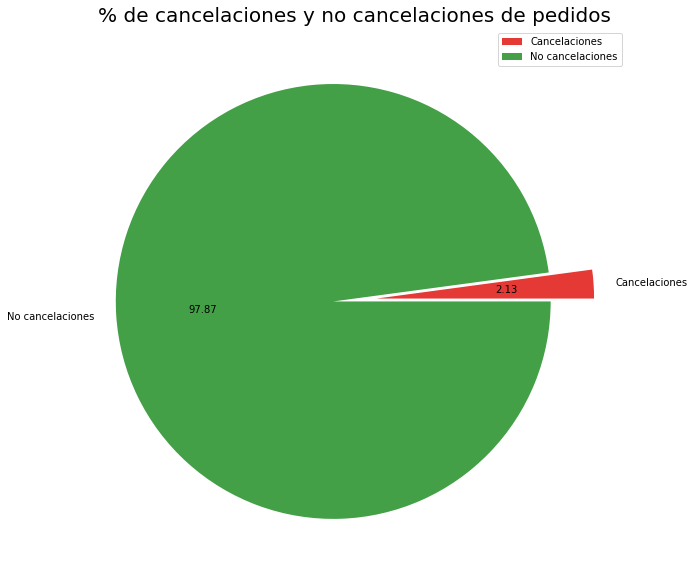

In [78]:
plt.figure(figsize=(18,10))
explode = [0.1, 0.1]
color = ["#E53935", "#43A047"]
plt.pie(df_invoiceNo["Cantidad"], labels= df_invoiceNo["Estado"], autopct="%.2f", explode=explode, colors = color)
plt.legend(loc = "best")
plt.title("% de cancelaciones y no cancelaciones de pedidos", fontsize = 20)
plt.show()

In [8]:
# Se sacan los descuentos y "manuales"
df_cancelados = df[(df.InvoiceNo.str.contains("C") == True) & ~((df.StockCode == "D") | (df.StockCode == "M"))]
df_cancelados

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country,Month,Year,Quarter,Semana,DiaSemana,Dia,yearmonth
154,C536383,2010-12-01 09:49:00,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,-4.65,15311,United Kingdom,12,2010,4,48,2,1,201012
235,C536391,2010-12-01 10:24:00,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,-19.80,17548,United Kingdom,12,2010,4,48,2,1,201012
236,C536391,2010-12-01 10:24:00,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,-6.96,17548,United Kingdom,12,2010,4,48,2,1,201012
237,C536391,2010-12-01 10:24:00,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,-6.96,17548,United Kingdom,12,2010,4,48,2,1,201012
238,C536391,2010-12-01 10:24:00,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,0.29,-6.96,17548,United Kingdom,12,2010,4,48,2,1,201012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406376,C581490,2011-12-09 09:57:00,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,1.95,-23.40,14397,United Kingdom,12,2011,4,49,4,9,201112
406377,C581490,2011-12-09 09:57:00,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,-9.13,14397,United Kingdom,12,2011,4,49,4,9,201112
406635,C581568,2011-12-09 11:57:00,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,-54.75,15311,United Kingdom,12,2011,4,49,4,9,201112
406636,C581569,2011-12-09 11:58:00,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,-1.25,17315,United Kingdom,12,2011,4,49,4,9,201112


In [25]:
df_productosC = df_cancelados.groupby("Description").agg({
    "StockCode": "count",
    "Quantity": "sum",
    "Amount_Spent": "sum"
})
# Se convierten los campos negativos a positivos
df_productosC["Quantity"] = df_productosC["Quantity"].apply(lambda x: -x)
df_productosC["Amount_Spent"] = df_productosC["Amount_Spent"].apply(lambda x: -x)

# Se seleccionan las columnas de interes
df_productosSC = df_productosC[["StockCode"]].sort_values("StockCode", ascending = False).head(10)
df_productosQ = df_productosC[["Quantity"]].sort_values("Quantity", ascending = False).head(10)
df_productosAS = df_productosC[["Amount_Spent"]].sort_values("Amount_Spent", ascending = False).head(10)

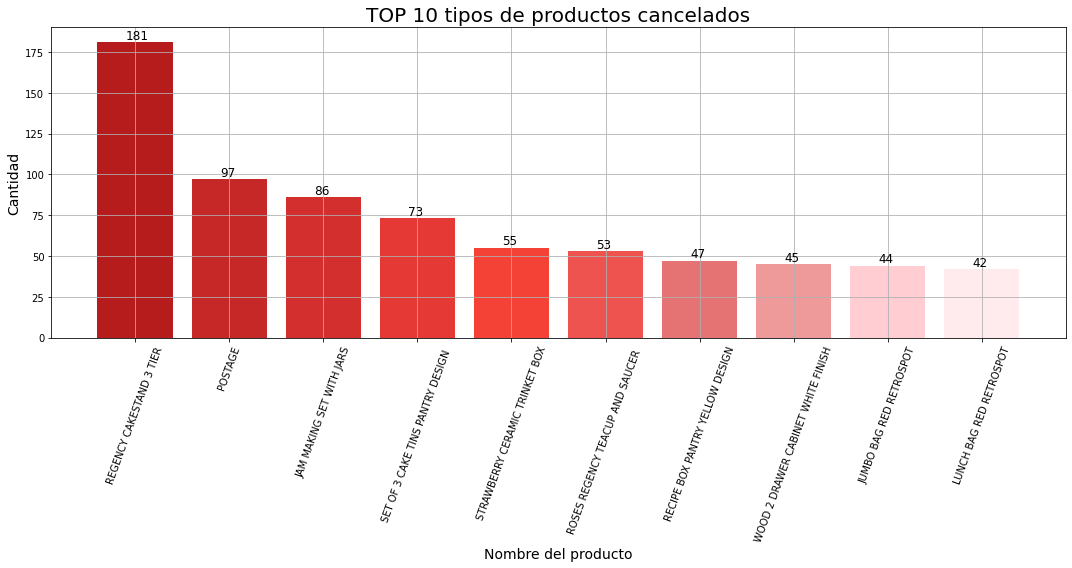

In [82]:
color_palet = ["#B71C1C", "#C62828", "#D32F2F", "#E53935", "#F44336", "#EF5350", "#E57373", "#EF9A9A", "#FFCDD2", "#FFEBEE"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(df_productosSC.index, df_productosSC["StockCode"], color = color_palet)
plt.xticks(rotation = 70)
plt.xlabel("Nombre del producto", fontsize = 14)
plt.ylabel("Cantidad", fontsize = 14)
plt.title("TOP 10 tipos de productos cancelados", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(df_productosSC["StockCode"]):
    plt.text(x = index-0.098, y = data + 2, s = f"{data}", fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

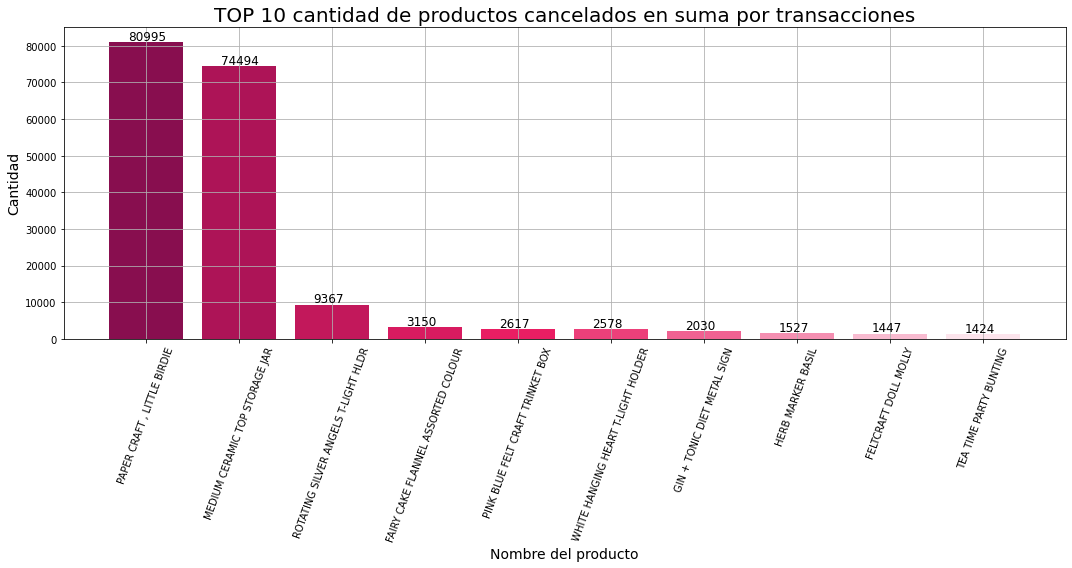

In [84]:
color_palet = ["#880E4F", "#AD1457", "#C2185B", "#D81B60", "#E91E63", "#EC407A", "#F06292", "#F48FB1", "#F8BBD0", "#FCE4EC"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(df_productosQ.index, df_productosQ["Quantity"], color = color_palet)
plt.xticks(rotation = 70)
plt.xlabel("Nombre del producto", fontsize = 14)
plt.ylabel("Cantidad", fontsize = 14)
plt.title("TOP 10 cantidad de productos cancelados en suma por transacciones", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(df_productosQ["Quantity"]):
    plt.text(x = index-0.2, y = data + 500, s = f"{data}", fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

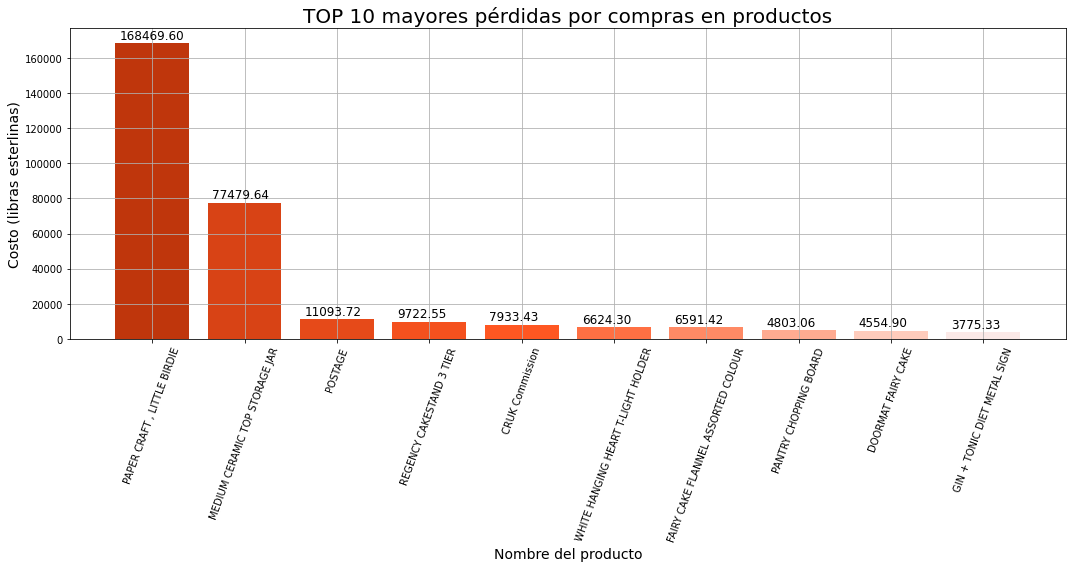

In [85]:
color_palet = ["#BF360C", "#D84315", "#E64A19", "#F4511E", "#FF5722", "#FF7043", "#FF8A65", "#FFAB91", "#FFCCBC", "#FBE9E7"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(df_productosAS.index, df_productosAS["Amount_Spent"], color = color_palet)
plt.xticks(rotation = 70)
plt.xlabel("Nombre del producto", fontsize = 14)
plt.ylabel("Costo (libras esterlinas)", fontsize = 14)
plt.title("TOP 10 mayores pérdidas por compras en productos", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(df_productosAS["Amount_Spent"]):
    plt.text(x = index-0.35, y = data + 2400, s = "{0:.2f}".format(data), fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

In [103]:
df_paisesC = df_cancelados.groupby("Country").agg({
    "Description": "count"
})
df_paisesC = df_paisesC.sort_values("Description", ascending = False).head(10)
df_paisesC

,Description
Country,
United Kingdom,7325
Germany,446
EIRE,243
France,145
USA,112
Australia,74
Spain,45
Italy,43
Belgium,38


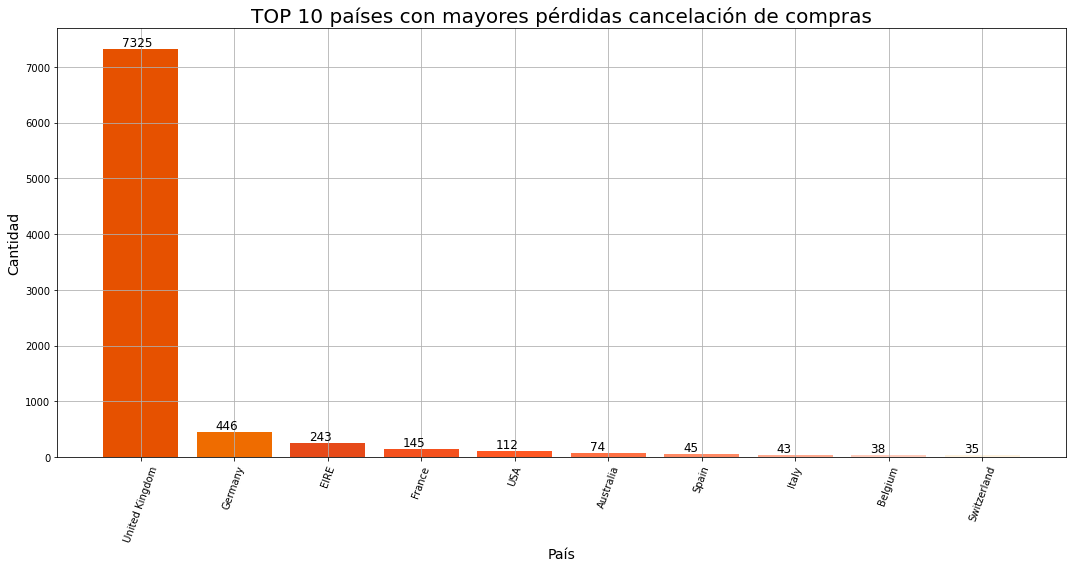

In [116]:
color_palet = ["#E65100", "#EF6C00", "#E64A19", "#F4511E", "#FF5722", "#FF7043", "#FF8A65", "#FFAB91", "#FFCCBC", "#FFF3E0"]
plt.figure(figsize=(15,8))
plt.grid()
plt.bar(df_paisesC.index, df_paisesC["Description"], color = color_palet)
plt.xticks(rotation = 70)
plt.xlabel("País", fontsize = 14)
plt.ylabel("Cantidad", fontsize = 14)
plt.title("TOP 10 países con mayores pérdidas cancelación de compras", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(df_paisesC["Description"]):
    plt.text(x = index-0.2, y = data + 50, s = data, fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

- Listar productos favoritos de clientes
- Horario específico en que los clientes compran. Sugerencia de horario para aumentar capacidad
- Frecuencia de compra de los clientesde alta frecuencia. Cuánto debería gastar un cliente para considerarlo sobre la media.
- Cómo distribuye la antigüedad de los clientes 
- Clusterizacion en 3 en base a la frecuencia de compra (kmeans)

## Lista de productos favoritos comprados por los clientes
Primero se extraen del total de registros del data set, aquellos que no correspondan a devoluciones o cancelaciones de compras, esta regla se cumple cuando la variable del número de factura (InvoiceNo) no contiene una letra C. Posterior a esto, se agrupa por descripción de producto y se cuenta la cantidad de éstos que están repetidos, se suman las cantidades compradas en transacciones por cada caso y se suman los costos totales por cada caso en transacciones, para finalmente elegir el TOP 10 por cada uno.

In [155]:
df_compras = df[~(df.InvoiceNo.str.contains("C") == True)]
df_compras.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Amount_Spent,CustomerID,Country,Month,Year,Quarter,Semana,DiaSemana,Dia,NombreDia,Date,Yearmonth,Hour
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom,12,2010,4,48,2,1,Wednesday,2010-12-01,2010-12,8
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom,12,2010,4,48,2,1,Wednesday,2010-12-01,2010-12,8
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom,12,2010,4,48,2,1,Wednesday,2010-12-01,2010-12,8
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom,12,2010,4,48,2,1,Wednesday,2010-12-01,2010-12,8
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom,12,2010,4,48,2,1,Wednesday,2010-12-01,2010-12,8


In [156]:
df_compras.describe()

,Quantity,UnitPrice,Amount_Spent,CustomerID,Month,Year,Quarter,Semana,DiaSemana,Dia,Hour
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,22.394749,15294.315171,7.612537,2010.934259,2.856106,30.964629,2.614555,15.042181,12.728247
std,180.420210,22.096788,309.055588,1713.169877,3.416527,0.247829,1.121873,14.755880,1.928274,8.653771,2.273535
min,1.000000,0.000000,0.000000,12346.000000,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,6.000000
25%,2.000000,1.250000,4.680000,13969.000000,5.000000,2011.000000,2.000000,19.000000,1.000000,7.000000,11.000000
50%,6.000000,1.950000,11.800000,15159.000000,8.000000,2011.000000,3.000000,34.000000,2.000000,15.000000,13.000000
75%,12.000000,3.750000,19.800000,16795.000000,11.000000,2011.000000,4.000000,44.000000,4.000000,22.000000,14.000000
max,80995.000000,8142.750000,168469.600000,18287.000000,12.000000,2011.000000,4.000000,51.000000,6.000000,31.000000,20.000000


In [157]:
df_productos = df_compras.groupby("Description").agg({
    "Description": "count",
    "Quantity": "sum",
    "Amount_Spent": "sum"
})
df_productos["NombreProducto"] = df_productos.index
df_productos.reset_index(drop=True, inplace = True)

# Se seleccionan las columnas de interes
df_productosSC = df_productos[["Description", "NombreProducto"]].sort_values("Description", ascending = False).head(10)
df_productosQ = df_productos[["Quantity", "NombreProducto"]].sort_values("Quantity", ascending = False).head(10)
df_productosAS = df_productos[["Amount_Spent", "NombreProducto"]].sort_values("Amount_Spent", ascending = False).head(10)

In [158]:
df_productosQ

,Quantity,NombreProducto
2319,80995,"PAPER CRAFT , LITTLE BIRDIE"
1992,77916,MEDIUM CERAMIC TOP STORAGE JAR
3786,54415,WORLD WAR 2 GLIDERS ASSTD DESIGNS
1762,46181,JUMBO BAG RED RETROSPOT
3698,36725,WHITE HANGING HEART T-LIGHT HOLDER
216,35362,ASSORTED COLOUR BIRD ORNAMENT
2269,33693,PACK OF 72 RETROSPOT CAKE CASES
2600,30931,POPCORN HOLDER
2656,27202,RABBIT NIGHT LIGHT
2047,26076,MINI PAINT SET VINTAGE


Listad de productos más comprados (Quantity) por los clientes

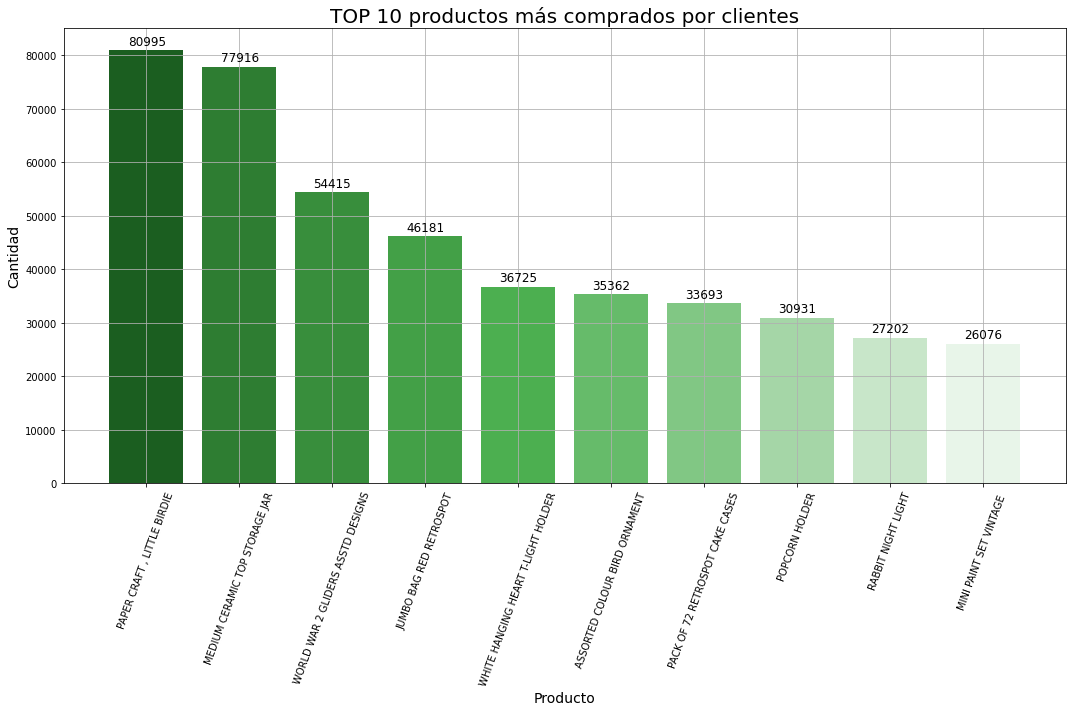

In [159]:
color_palet = ["#1B5E20", "#2E7D32", "#388E3C", "#43A047", "#4CAF50", "#66BB6A", "#81C784", "#A5D6A7", "#C8E6C9", "#E8F5E9"]
plt.figure(figsize=(15,10))
plt.grid()
plt.bar(df_productosQ["NombreProducto"], df_productosQ["Quantity"], color = color_palet)
plt.xticks(rotation = 70)
plt.xlabel("Producto", fontsize = 14)
plt.ylabel("Cantidad", fontsize = 14)
plt.title("TOP 10 productos más comprados por clientes", fontsize = 20)
# Se muestra la cantidad por cada barra
for index,data in enumerate(df_productosQ["Quantity"]):
    plt.text(x = index-0.2, y = data + 1000, s = data, fontdict=dict(fontsize = 12))
plt.tight_layout()
plt.show()

Horario específico de compra

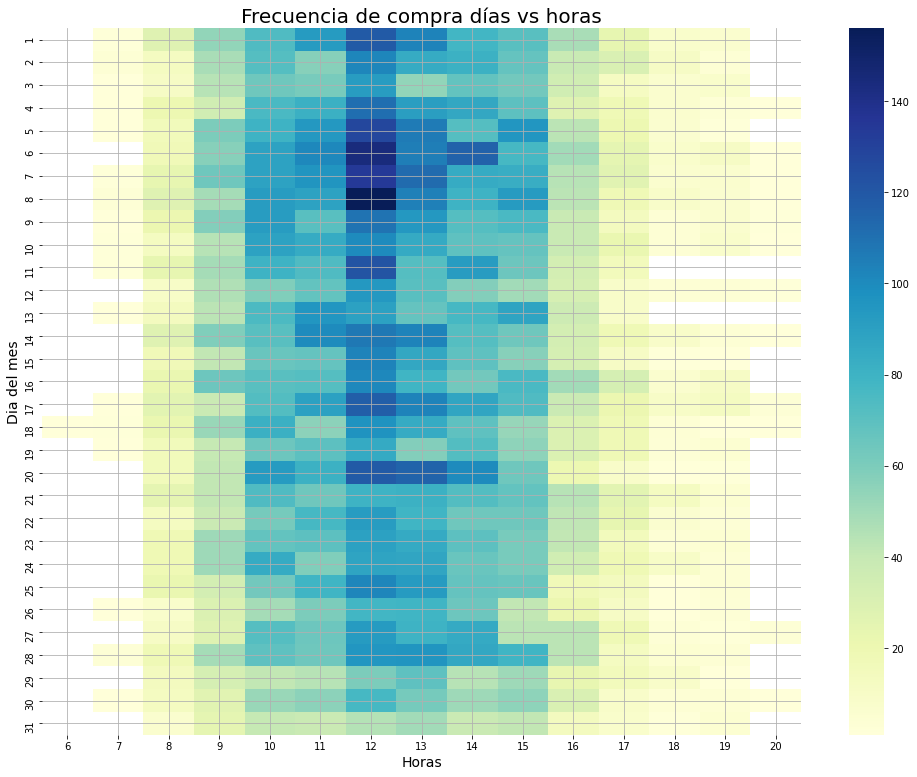

In [160]:
# Se agrupa por dia y hora la cantidad de facturas UNICAS ocurridas y se almcanena como arreglo
grouped_data_new  = df_compras.groupby(["Dia", "Hour"])["InvoiceNo"].unique().reset_index()
# Del dato agrupado se cuenta la cantidad de transaccioens que hubo
grouped_data_new["InvoiceNo"] = grouped_data_new["InvoiceNo"].apply(len)
# Se deja como indice de la matriz los dias y las horas para posterior rellenar esta con la cantidad de transacciones
grouped_data_new = grouped_data_new.pivot('Dia', 'Hour', 'InvoiceNo')

# Se instancia mapa de calor de las horas con mas transacciones respecto a los dias
plt.figure(figsize=(17,13))
sns.heatmap(grouped_data_new, cmap="YlGnBu")
plt.title("Frecuencia de compra días vs horas" , fontsize = 20)
plt.xlabel("Horas", fontsize = 14)
plt.ylabel("Dia del mes", fontsize = 14)
plt.grid()
plt.show()

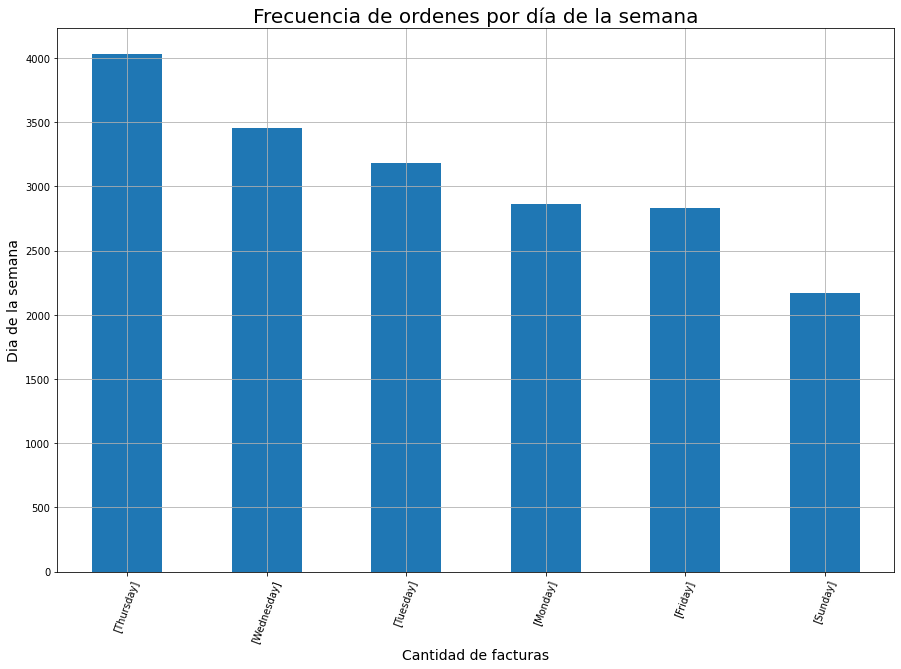

In [161]:
# Se agrupa la cantidad de facturas UNICAS por dia
InvoiceDate = df_compras.groupby(['InvoiceNo'])['NombreDia'].unique()
dfm =  InvoiceDate.value_counts().sort_index( ascending=True)
dfm.to_frame().sort_values("NombreDia", ascending = False).plot.bar(figsize=(15,10), legend=None)
plt.title("Frecuencia de ordenes por día de la semana", fontsize=20)
plt.xlabel("Cantidad de facturas", fontsize = 14)
plt.ylabel("Dia de la semana", fontsize = 14)
plt.xticks(rotation = 70)
plt.grid()
plt.show()

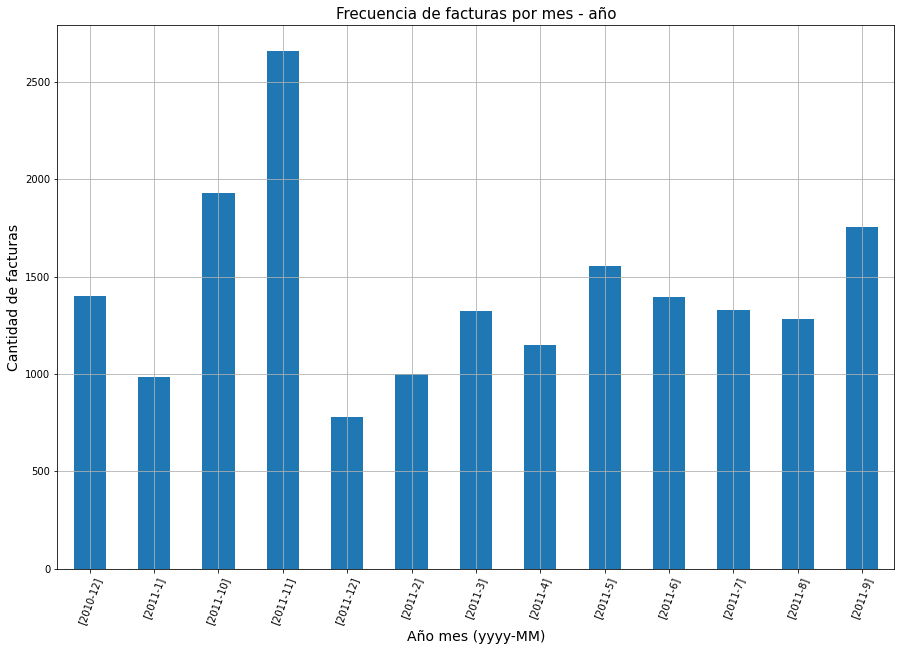

In [163]:
# Grafico de numero de factoras por mes - año
plt.figure(figsize=(15,10))
InvoiceDate = df_compras.groupby(['InvoiceNo'])['Yearmonth'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()
plt.title("Frecuencia de facturas por mes - año", fontsize=15)
plt.xlabel("Año mes (yyyy-MM)", fontsize = 14)
plt.ylabel("Cantidad de facturas", fontsize = 14)
plt.xticks(rotation = 70)
plt.grid()
plt.show()

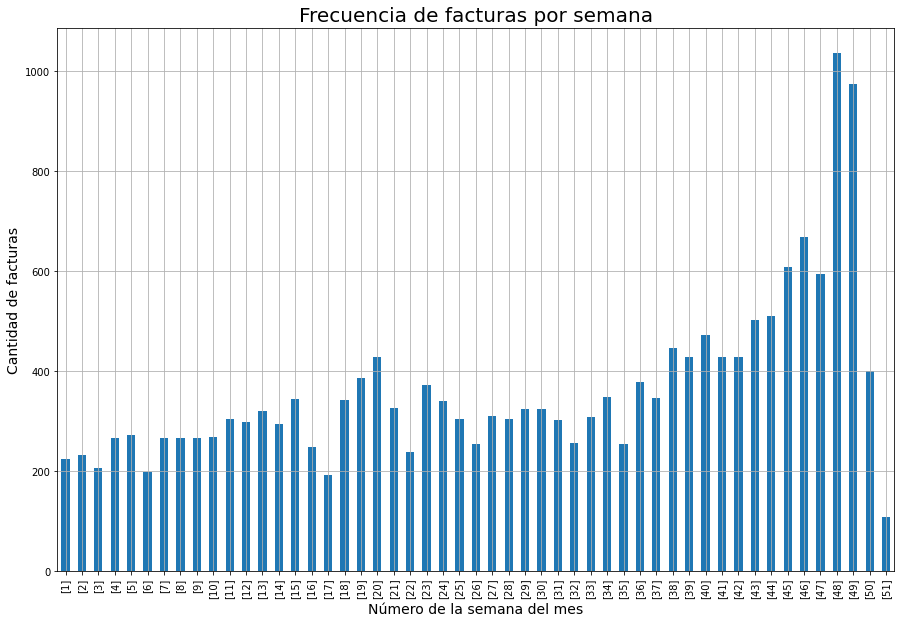

In [164]:
plt.figure(figsize=(15,10))
InvoiceDate = df_compras.groupby(['InvoiceNo'])['Semana'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()
plt.title("Frecuencia de facturas por semana", fontsize=20)
plt.xlabel("Número de la semana del mes", fontsize = 14)
plt.ylabel("Cantidad de facturas", fontsize = 14)
plt.grid()
plt.show()

## RFM
Se aplica una segmentación RFM para alcanzar el grupo específico de consumidores, basados en el historial de transacciones de los clientes:
- Ultima compra
- Frecuencia de compra
- Gasto en la última compra

<br>

- R: recencia, días desed la última compra realizada
- F: frecuencia, total de compras realizadas
- M: monetario, valor de la compra realizada

La segmentación RFM se basa en el principio de que el 80% de los ingresos proviene del 20% de los clientes. Para esto se trabaja con puntajes de cuantiles.

### Cálculo de la Recencia (días desde la última compra realizada)

In [259]:
# En un nuevo DF se agrupan los consumidores (CustomerID) según su última compra
recency_df_compras = df_compras.groupby(by='CustomerID', as_index=False)['Date'].max()
# Se crean las columnas asociadas a los campos nuevos
recency_df_compras.columns = ['CustomerID','LastPurchaseDate']
recency_df_compras.head()

,CustomerID,LastPurchaseDate
0,12346,2011-01-18
1,12347,2011-12-07
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02


In [260]:
# Se obtiene el rango de fechas que abarca el set de datos
print("Fecha de inicio: ", df_compras["InvoiceDate"].dt.date.min())
print("Fecha de término: ", df_compras["InvoiceDate"].dt.date.max())

Fecha de inicio:  2010-12-01
Fecha de término:  2011-12-09


Se sabe que la última compra se realizó el 09-12-2011, por lo que se emplea esta última para calcular el recencia

In [261]:
# Se calcula la recencia en días, en base a la fecha de la ultima compra menos la fecha de la compra del cliente
recency_df_compras['Recency'] = recency_df_compras['LastPurchaseDate'].apply(lambda x: (df_compras["InvoiceDate"].dt.date.max() - x.date()).days)
recency_df_compras

,CustomerID,LastPurchaseDate,Recency
0,12346,2011-01-18,325
1,12347,2011-12-07,2
2,12348,2011-09-25,75
3,12349,2011-11-21,18
4,12350,2011-02-02,310
...,...,...,...
4334,18280,2011-03-07,277
4335,18281,2011-06-12,180
4336,18282,2011-12-02,7
4337,18283,2011-12-06,3


### Cálculo de la frecuencia 

In [263]:
# Se realiza una copia del dataset de compras
frequency_data = df_compras.copy()
# Se eliminan los datos duplicados que esten sobre el numero de factura y el id de cliente
frequency_data.drop_duplicates(subset=['CustomerID','InvoiceNo'], keep="first", inplace=True) 
frequency_data.shape

(18536, 19)

In [266]:
# Se agrupa por id y se cuenta la cantidad de numero de facturas por cliente
frequency_df_compras = frequency_data.groupby('CustomerID',as_index=False)['InvoiceNo'].count()
# Se asignan los nombres a las columnas
frequency_df_compras.columns = ['CustomerID','Frequency']
frequency_df_compras

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4334,18280,1
4335,18281,1
4336,18282,2
4337,18283,16


### Cálculo del monetario

In [265]:
# Se suma todo el gasto por cada id de cliente
monetary_df_compras = df_compras.groupby('CustomerID',as_index=False)['Amount_Spent'].sum()
monetary_df_compras.columns = ['CustomerID','Monetary']
monetary_df_compras

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2094.88


Se combinan los 3 dataset creados asociados a la segmentacion RFM

In [267]:
#combinar recency, frecuency, monetary
rf = recency_df_compras.merge(frequency_df_compras, left_on='CustomerID', right_on='CustomerID')
rfm = rf.merge(monetary_df_compras, left_on='CustomerID', right_on='CustomerID' )
# Se borra la columna de la ultima fecha de compra
del rfm["LastPurchaseDate"]
# Se deja el id de cliente como indice del dataset
rfm.set_index('CustomerID',inplace=True)
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,178.05


In [268]:
#separarar en cuantiles, para obtener las fronteras
quantile = rfm.quantile(q=[0.25, 0.5, 0.75])
quantile

,Recency,Frequency,Monetary
0.25,17.0,1.0,307.245
0.50,50.0,2.0,674.450
0.75,141.5,5.0,1661.640


In [253]:
# Definir score (x = valor, p = recency, monetary, frequency, d= cuartil)
# valor bajo en recency es bueno para la tienda
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Definir score (x = valor, p = recency, monetary, frequency, d= cuartil)
# alto valor en monetary y frequency es bueno para la tienda
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [257]:
# Se determina el cuartil al que pertenecen en cada categoría de RFM
rfm['R_Quantile'] = rfm['Recency'].apply(RScore, args=('Recency', quantile))
rfm['F_Quantile'] = rfm['Frequency'].apply(FMScore, args=('Frequency', quantile))
rfm['M_Quantile'] = rfm['Monetary'].apply(FMScore, args=('Monetary', quantile))

In [258]:
#calcular el RFM score
rfm['RFMScore'] = rfm.R_Quantile.map(str) \
                            + rfm.F_Quantile.map(str) \
                            + rfm.M_Quantile.map(str)
rfm

,Recency,Frequency,Monetary,R_Quantile,F_Quantile,M_Quantile,RFMScore
CustomerID,,,,,,,
12346,325,1,77183.60,4,4,1,441
12347,2,7,4310.00,1,1,1,111
12348,75,4,1797.24,3,2,1,321
12349,18,1,1757.55,2,4,1,241
12350,310,1,334.40,4,4,3,443
...,...,...,...,...,...,...,...
18280,277,1,180.60,4,4,4,444
18281,180,1,80.82,4,4,4,444
18282,7,2,178.05,1,3,4,134


Se obtiene cierta clasificación de la cantidad de clientes

In [256]:
print("Mejores Clientes: ",len(rfm[rfm['RFMScore']=='111']))
print('Clientes Leales: ',len(rfm[rfm['F_Quantile']==1]))
print("Grandes Gastadores: ",len(rfm[rfm['M_Quantile']==1]))
print('Casi Perdidos: ', len(rfm[rfm['RFMScore']=='134']))
print('Clientes Perdidos: ',len(rfm[rfm['RFMScore']=='344']))
print('Clientes Baratos Perdidos: ',len(rfm[rfm['RFMScore']=='444']))

Mejores Clientes:  456
Clientes Leales:  872
Grandes Gastadores:  1085
Casi Perdidos:  34
Clientes Perdidos:  208
Clientes Baratos Perdidos:  443
